In [1]:
from standardInclude import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


In [2]:
t = r.TChain("t0Analyzer/t0Tree")
t.Add("./data/gm2nearline_hists_run33149*")

16

In [3]:
t2 = r.TChain("t0Analyzer/t0Tree")
t2.Add("./data/gm2nearline_hists_run33148*")

23

In [4]:
t3 = r.TChain("t0Analyzer/t0Tree")
t3.Add("./data/gm2nearline_hists_run33150*")

12

In [5]:
t4 = r.TChain("t0Analyzer/t0Tree")
t4.Add("./data/gm2nearline_hists_run33167*")

28

In [6]:
t5 = r.TChain("t0Analyzer/t0Tree")
t5.Add("./data/gm2nearline_hists_run33172*")

16

In [7]:
t6 = r.TChain("t0Analyzer/t0Tree")
t6.Add("./data/gm2nearline_hists_run33173*")

2

In [24]:
t7 = r.TChain("t0Analyzer/t0Tree")
t7.Add("./data/gm2nearline_hists_run33202*")

29

In [26]:
t8 = r.TChain("t0Analyzer/t0Tree")
t8.Add("./data/gm2nearline_hists_run33195*")

16

In [30]:
t9 = r.TChain("t0Analyzer/t0Tree")
t9.Add("./data/gm2nearline_hists_run33239*")

6

In [18]:
def plotT0SingleBunch(t, ax, bunch, rangeAroundMaximum = 300, labeli=""):
        #nsamples = t.Draw("sampleNums:tracetubeA","pulseIndex == "+str(bunch),"goff")
        if(bunch >= 0):
            previousError = int(r.gErrorIgnoreLevel)
            r.gErrorIgnoreLevel = 100000
            newfile = r.TFile("intermediate.root", "recreate")
            ti = t.CopyTree("pulseIndex == "+str(bunch))
            ti.ResetBranchAddress(ti.GetBranch("sampleNums"))
            newfile.Write()
            r.gErrorIgnoreLevel = previousError
        else:
            ti = t
        ti.Draw("sampleNums:tracetubeA","","goff")
        samples = list(ti.sampleNums[:-1])
        tubeA = list(ti.tracetubeA)
        maxIndex = tubeA.index(max(tubeA))
        minsamp = samples[maxIndex - rangeAroundMaximum]
        maxsamp = samples[maxIndex + rangeAroundMaximum]
        xlims = [minsamp, maxsamp]
        hi = r.TH1D("hi","hi",2*rangeAroundMaximum, minsamp, maxsamp)
        for i in range(2*rangeAroundMaximum):
            hi.SetBinContent(i+1, tubeA[i])
        print(hi.GetMean(), hi.GetRMS())
        ding = ax.plot(samples, tubeA, label=str(labeli)+" ")
        ax.set_xlim(xlims[0], xlims[1])
        ax.set_title("Bunch "+str(bunch))
        #newfile.Close()
        params = [hi.GetMean(), hi.GetRMS()]
        return (samples, tubeA, params)

In [31]:
r.gErrorIgnoreLevel 

100000

104871.99785017085 173.20445490607423


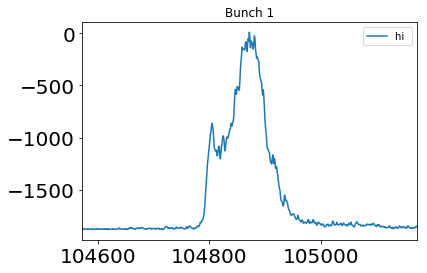

In [32]:
fig, ax = plt.subplots()
ding = plotT0SingleBunch(t9, ax, 1, 300,"hi")
plt.legend()
plt.show()

In [21]:
ding[2]

[104890.98948886544, 173.20427671883235]

Plotting bunch 0
104865.00286819105 173.21157018215513
104888.00152072853 173.20588273746682
104866.99678989458 173.20883583630362
104866.99580558663 173.20422407531973
Plotting bunch 1
104894.99273933898 173.20607946729746
104904.00616525493 173.20358329991063
104890.98948886544 173.20427671883235
104871.99785017085 173.20445490607423
Plotting bunch 2
104893.01981627052 173.20703272560243
104871.99213077319 173.2047989574682
104868.0035298275 173.20235008579152
104866.00065129198 173.20422328795195
Plotting bunch 3
104900.99881615778 173.2142560893105
104918.00558210601 173.20287230821208
104905.98817211176 173.20797790693985
104875.00788331189 173.20754847541053
Plotting bunch 4
104947.97411230062 173.20003841060537
104896.9858966038 173.20483065579623
104900.98162072217 173.19889083731806
104889.99598019269 173.21081629406433
Plotting bunch 5
104921.01082146929 173.20356550973668
104944.99550119118 173.20871058754776
104926.99821866864 173.20377454278858
104919.01062939783 173.20248

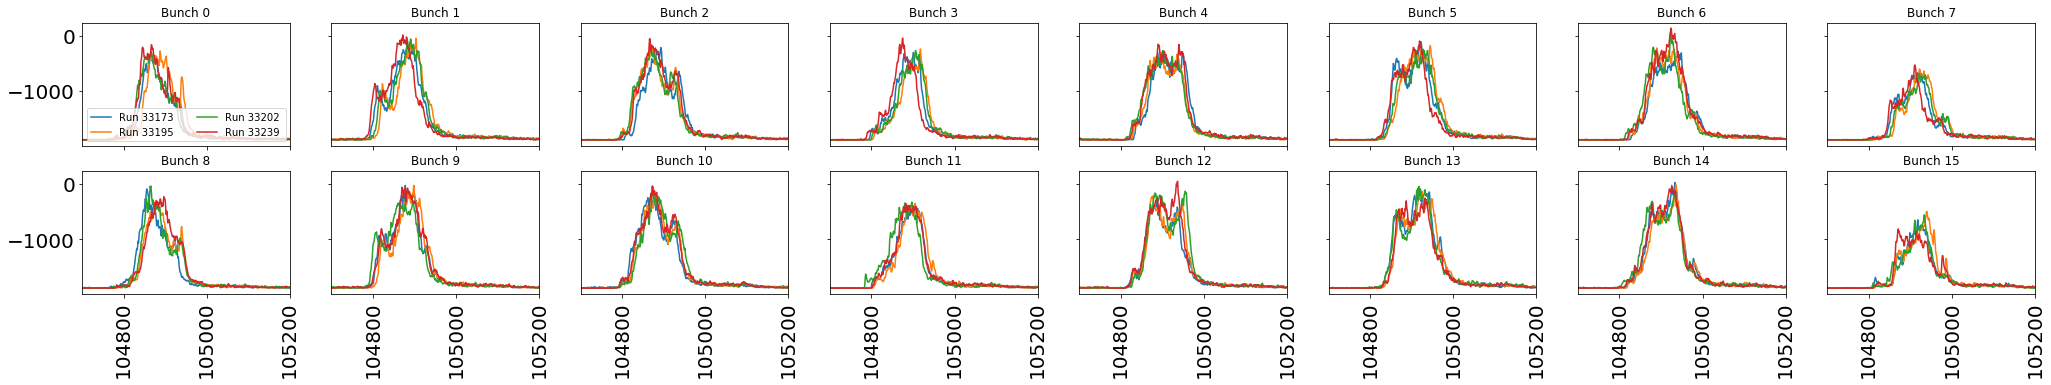

In [35]:
#fig,ax = plt.subplots(figsize=(15,5))
fig, axs = plt.subplots(2,8,figsize=(35,5),sharex=True, sharey=True)
ax = flatten2dArray(axs)
for bunch in range(16):
    print("Plotting bunch",bunch)
    #plotT0SingleBunch(t, ax[bunch], bunch, 300, labeli="Run 33149")
    #plotT0SingleBunch(t2, ax[bunch], bunch, 300, labeli="Run 33148")
    #plotT0SingleBunch(t3, ax[bunch], bunch, 300, labeli="Run 33150")
    #plotT0SingleBunch(t4, ax[bunch], bunch, 300, labeli="Run 33167")
    #plotT0SingleBunch(t5, ax[bunch], bunch, 300, labeli="Run 33172")
    plotT0SingleBunch(t6, ax[bunch], bunch, 300, labeli="Run 33173")
    plotT0SingleBunch(t8, ax[bunch], bunch, 300, labeli="Run 33195")
    plotT0SingleBunch(t7, ax[bunch], bunch, 300, labeli="Run 33202")
    plotT0SingleBunch(t9, ax[bunch], bunch, 300, labeli="Run 33239")
    #ax[i].plot(ding[0][i],ding[1][i],label="Run 33149 Bunch "+str(i))
    #ax[i].plot(dong[0][i],dong[1][i],label="Run 33148 Bunch "+str(i))
    ax[bunch].tick_params("x", labelrotation=90)
#plt.xlim(6500,7500)
plt.xlim(104700,105200)
ax[0].legend(ncol=2, loc=3)

plt.show()